In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import norm,skew
from sklearn.model_selection import train_test_split

%matplotlib	inline

In [316]:
data = pd.read_csv('datasets/housing/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 划分训练数据和测试数据

In [317]:
train_set,test_set = train_test_split(data,test_size=0.2,random_state=42)

housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [318]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


###  初窥数据 - 绘制柱状图
    
   可以看出数据的分布偏长尾分布

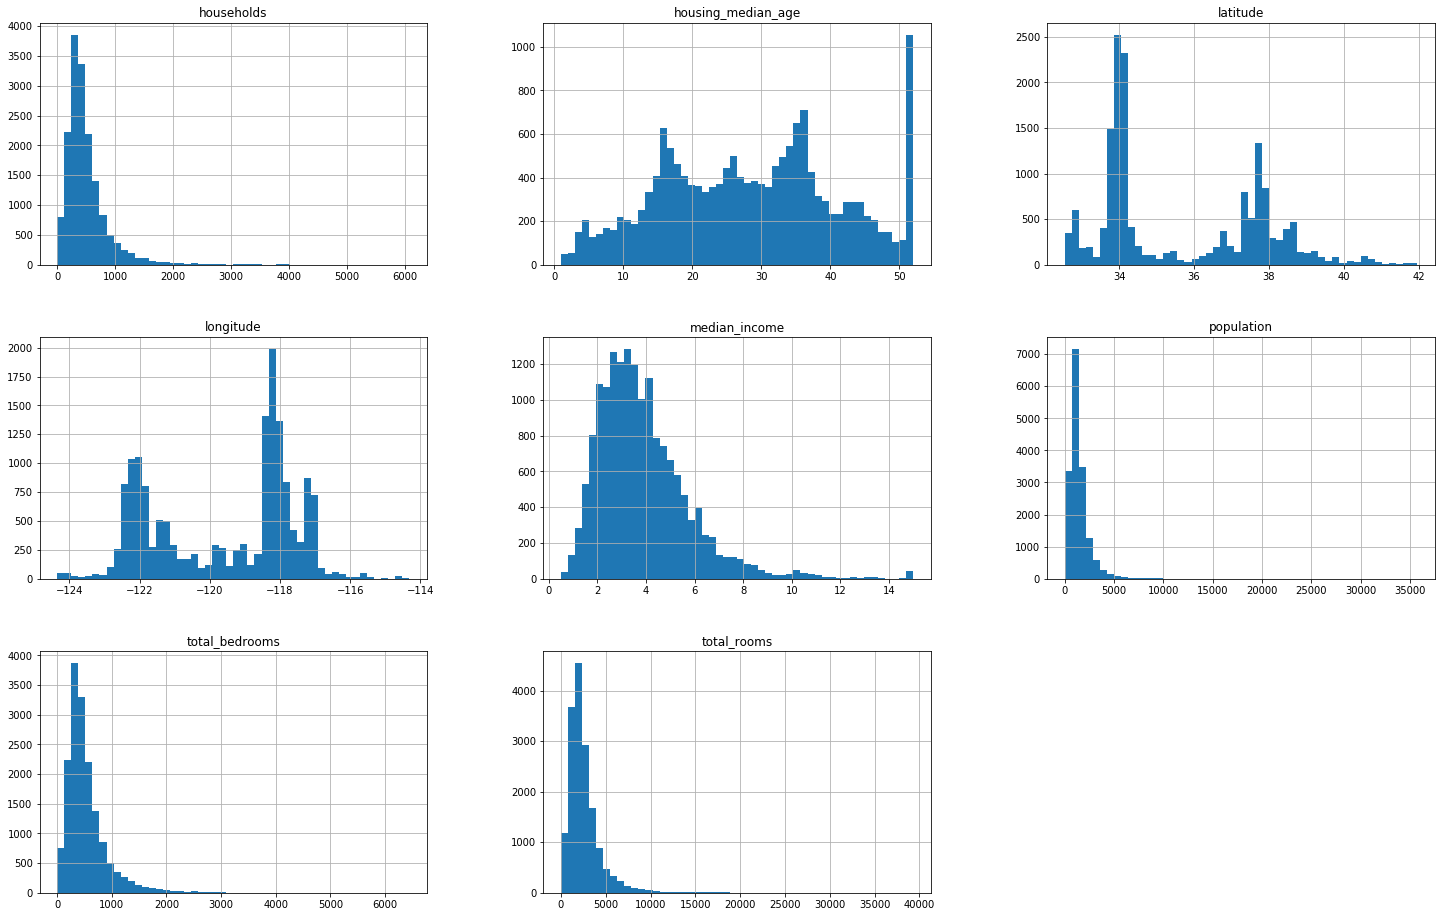

In [232]:
housing.hist(bins=50,figsize=(25,16))
plt.show()

#### 绘制各个属性之间的关系

D:\python\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\python\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


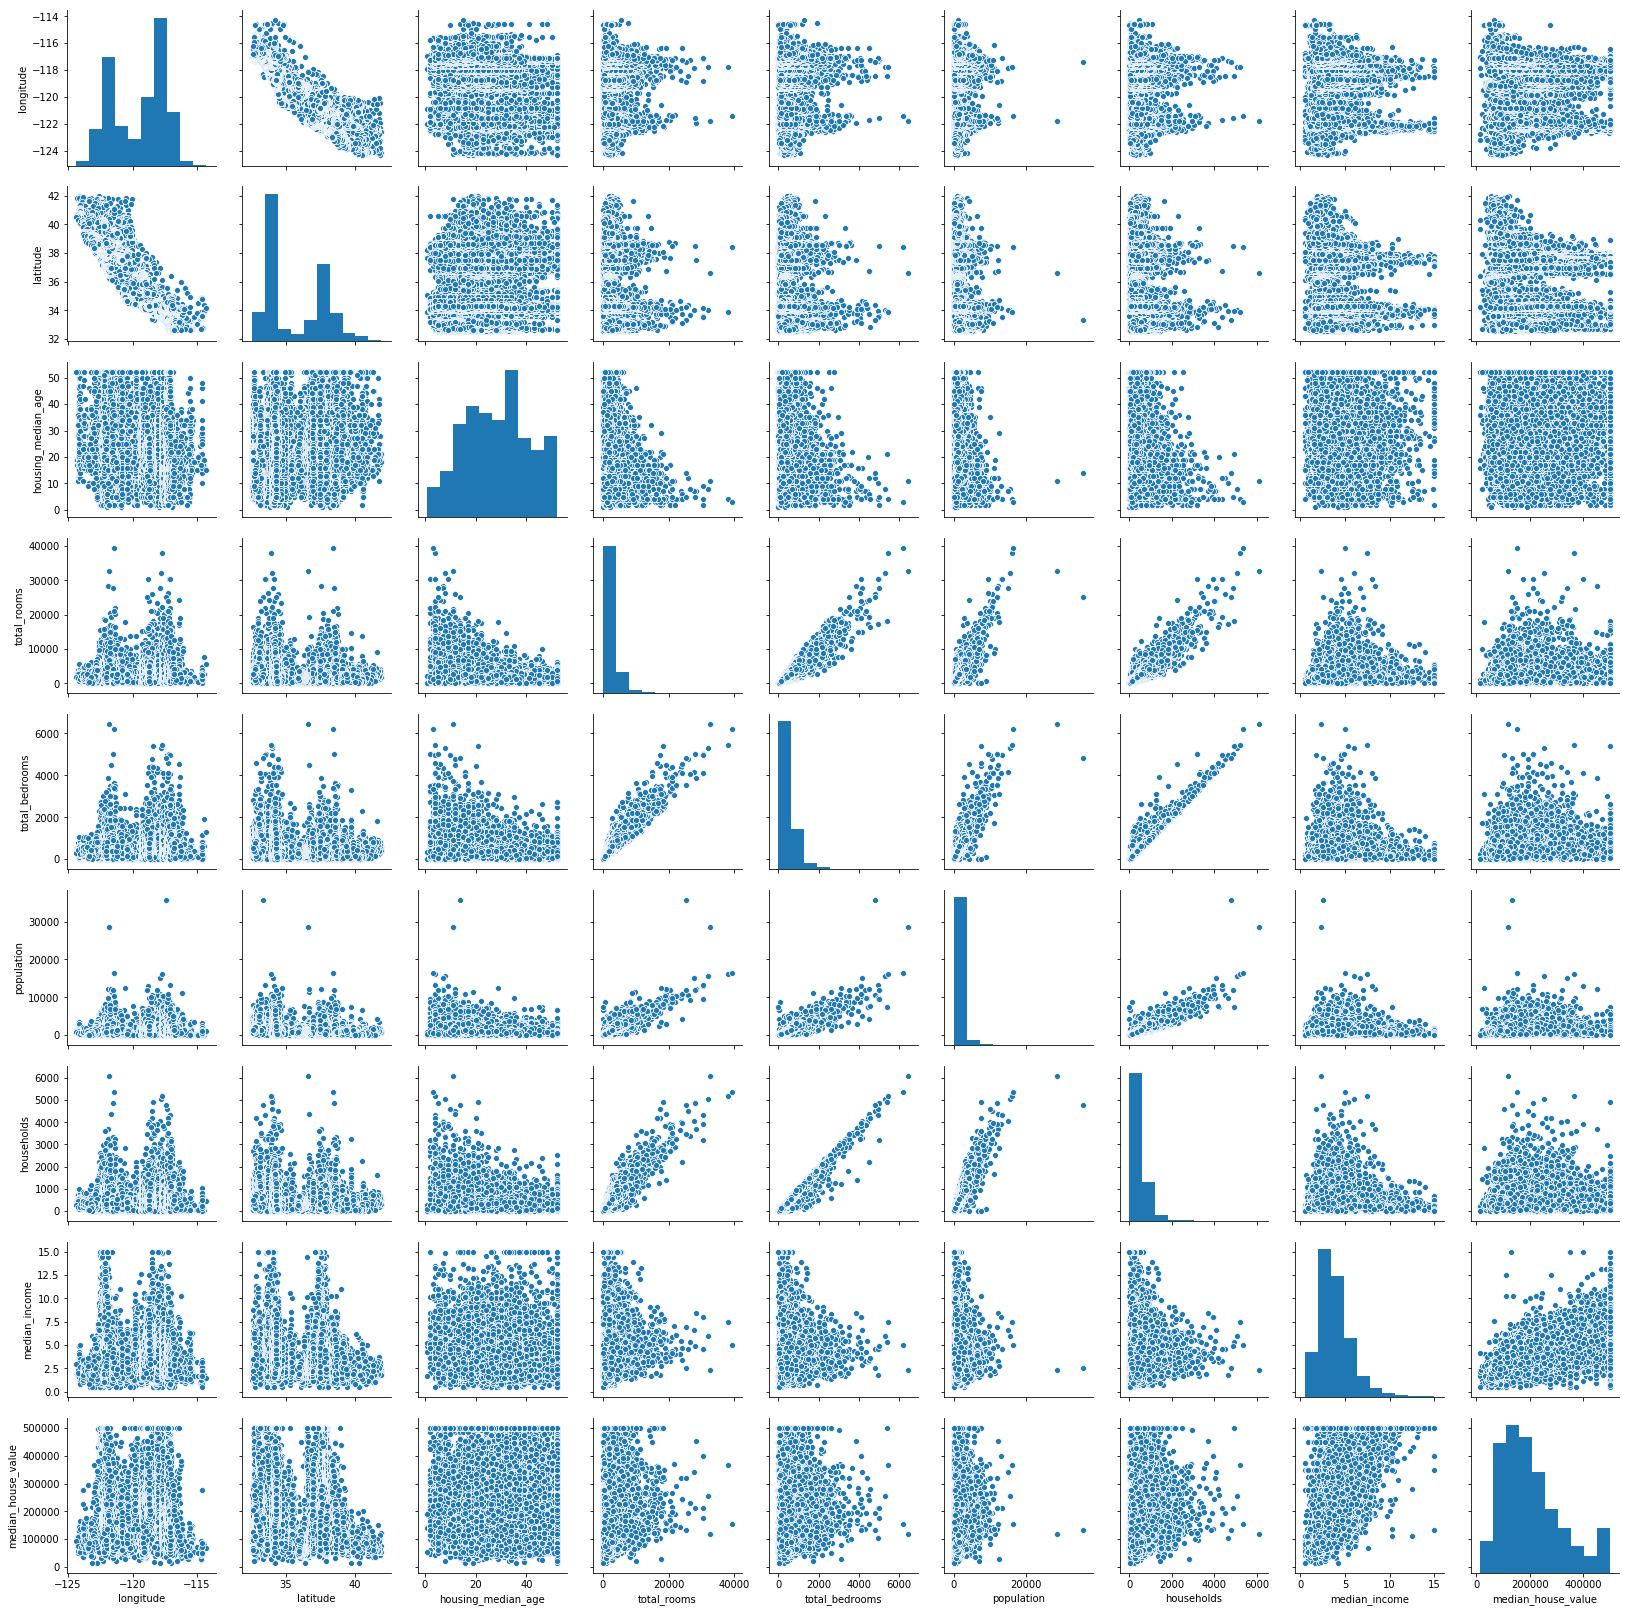

In [17]:
# sns.pairplot(housing)

#### 地理数据可视化

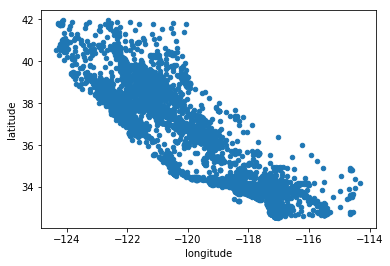

In [5]:
housing.plot(kind="Scatter",x='longitude',y='latitude')

#### 通过加透明度可以看出分布的密度关系

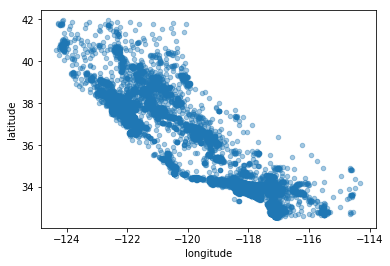

In [7]:
housing.plot(kind="Scatter",x='longitude',y='latitude',alpha=0.4)

#### 分析影响房价的多个因素

    参数解释：
    
        s为标记大小，也就是散点图的散点形状大小
        
        c为需要标记建渐变颜色的值，这里指定 median_house_value 为右侧的渐变线

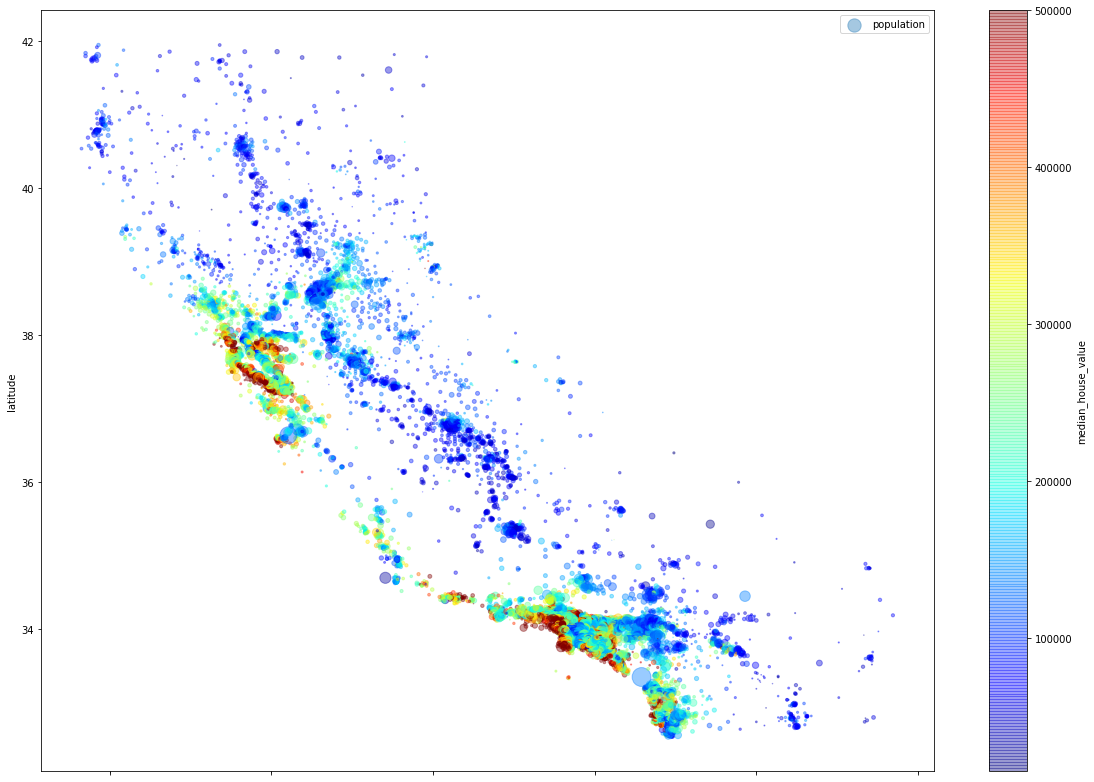

In [30]:
housing.plot(kind='Scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',c='median_house_value',
             cmap=plt.get_cmap('jet'),colorbar=True,figsize=(20,14))

#### 绘制热力图的函数

In [13]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### 绘制热力图

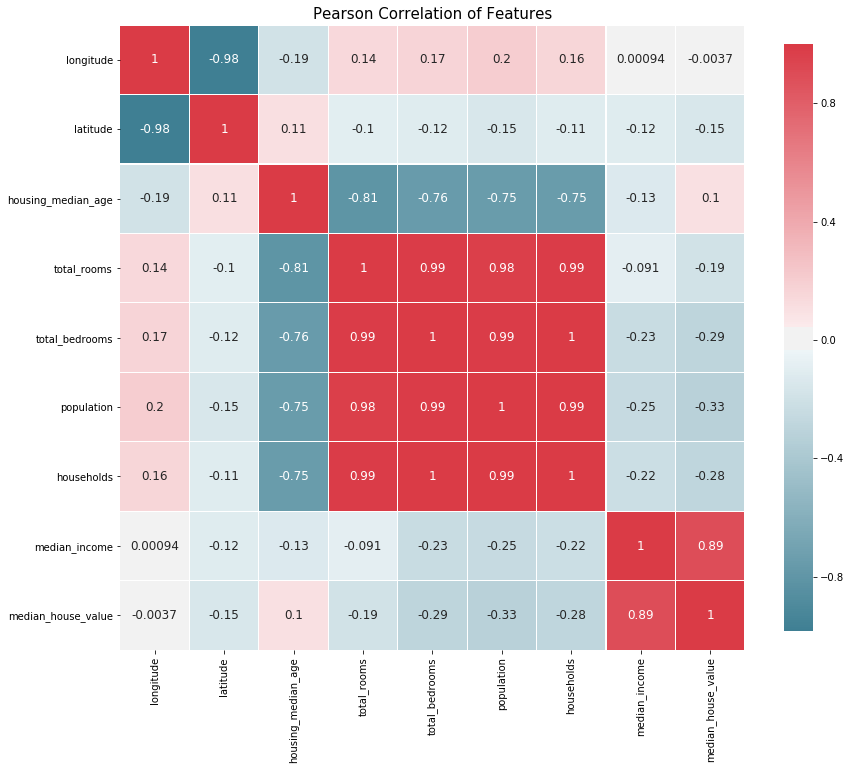

In [14]:
correlation_heatmap(housing.corr())

### 对数化 使数据转为正态分布

In [18]:
# housing["households"] = np.log1p(housing["households"])

# #Check the new distribution 
# sns.distplot(housing['households'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(housing['households'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

## 数据清洗

大多机器学习算法不能处理缺失的特征，因此先创建一些函数来处理特征缺失的问题。前面，你应该注意到了属性 total_bedrooms 有一些缺失值。

有三个解决选项：


*    去掉对应的街区；

*    去掉整个属性；

*    进行赋值（0、平均值、中位数等等）。

用 DataFrame 的 dropna() ， drop() ，和 fillna() 方法，可以方便地实现：

    housing.dropna(subset=["total_bedrooms"]) # 选项1
    housing.drop("total_bedrooms", axis=1) # 选项2
    median = housing["total_bedrooms"].median()
    housing["total_bedrooms"].fillna(median) # 选项3

如果__选择选项 3__，你需要计算训练集的中位数，用中位数填充训练集的缺失值，__不要忘记保存该中位数。后面用测试集评估系统时，需要替换测试集中的缺失值，也可以用来实时替换新数据中的缺失值。__


Scikit-Learn 提供了一个方便的类来处理缺失值： Imputer 。下面是其使用方法：首先，需要
创建一个 Imputer 实例，指定用某属性的中位数来替换该属性所有的缺失值：

In [319]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [320]:
from sklearn import impute

In [321]:
attribute = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]

In [322]:
imputer = impute.SimpleImputer(strategy='median')
imputer.fit(housing[attribute])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

imputer 计算出了每个属性的中位数，并将结果保存在了__实例变量 statistics_ 中。__

虽然此时只有属性 total_bedrooms 存在缺失值，__但我们不能确定在以后的新的数据中会不会有其他属性也存在缺失值，所以安全的做法是将 imputer 应用到每个数值：__

In [323]:
display(imputer.statistics_)

housing.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

__现在，你就可以使用这个“训练过的” imputer 来对训练集进行转换，将缺失值替换为中位数：__

In [324]:
housing[attribute].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [325]:
x = imputer.transform(housing[attribute])
display(x)
housing_tr = pd.DataFrame(x,columns=attribute) 
housing_tr.info()

array([[-1.1703e+02,  3.2710e+01,  3.3000e+01, ...,  2.3000e+03,
         6.2300e+02,  3.2596e+00],
       [-1.1816e+02,  3.3770e+01,  4.9000e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8125e+00],
       [-1.2048e+02,  3.4660e+01,  4.0000e+00, ...,  9.1500e+02,
         3.3600e+02,  4.1563e+00],
       ...,
       [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
         5.2700e+02,  2.9344e+00],
       [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
         5.5900e+02,  5.7192e+00],
       [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
         1.2420e+03,  2.5755e+00]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [326]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### LableEncode:

将特征 ocean_proximity 转为数字

In [327]:
from sklearn.preprocessing import LabelEncoder

In [328]:
# 实例化对象
le = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_encoding = le.fit_transform(housing_cat)
display(housing_encoding)
# 如果存在多列数据就不能使用LabelEncoder，可以使用factorize()
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

array([0, 0, 0, ..., 2, 2, 3], dtype=int64)

In [329]:
housing_categories

Index(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

你可以查看映射表，编码器是通
过属性 classes_ 来学习的（ <1H OCEAN 被映射为 0， INLAND 被映射为 1，等等）：

In [330]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

#### OneHotEncode:

将特征 ocean_proximity 转为onehot向量

In [331]:
from sklearn.preprocessing import OneHotEncoder

In [332]:
ohe = OneHotEncoder(categories='auto')
housing_cat = housing['ocean_proximity']
# 1、使用labelencode转化的结果进行onehot
# 但是要注意，我们只有一列数据，而使用fit_transform函数需要2D数据，这里我们需要使用reshape函数转换
# housing_cat_1hot = ohe.fit_transform(housing_cat_encoded.reshape(-1,1))
# 2、或者直接进行onehot转换
housing_hot_encoded = ohe.fit_transform(housing[['ocean_proximity']])
housing_hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

这里注意输出的数据是一个scipy的稀疏矩阵，这有利于节省内存，如果你想要将其转换为一个df数据，可以使用toarray()方法。

In [333]:
housing_hot_encoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [334]:
housing_hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### LabelBinarizer:

将特征 ocean_proximity 转为onehot向量

In [335]:
from sklearn.preprocessing import LabelBinarizer

In [336]:
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [337]:
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

#### CategoricalEncoder

In [338]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

### 自定义转换器

     np.r_ 是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
     np.c_ 是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。也就是向右新增合并列。

In [339]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix ,bedrooms_ix,population_ix,household_ix = 3,4,5,6

In [340]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room = add_bedroom_per_room
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household = x[:,rooms_ix]/x[:,household_ix]# 求取每个房间平均的房间数
        population_per_household = x[:,population_ix]/x[:,household_ix]# 求每个人拥有的平均房间数
        if self.add_bedroom_per_room:
            bedrooms_per_room = x[:,bedrooms_ix]/x[:,rooms_ix]#bedrooms_per_room为可选的合成属性
            return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]

In [341]:
attr_adder = CombinedAttributesAdder(add_bedroom_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [342]:
display(pd.DataFrame(housing_extra_attribs).head())
housing_extra_attribs.shape

,0,1,2,3,4,5,6,7,8,9,10
0,-117.03,32.71,33,3126,627,2300,623,3.2596,NEAR OCEAN,5.01766,3.69181
1,-118.16,33.77,49,3382,787,1314,756,3.8125,NEAR OCEAN,4.47354,1.7381
2,-120.48,34.66,4,1897,331,915,336,4.1563,NEAR OCEAN,5.64583,2.72321
3,-117.11,32.69,36,1421,367,1418,355,1.9425,NEAR OCEAN,4.00282,3.99437
4,-119.8,36.78,43,2382,431,874,380,3.5542,INLAND,6.26842,2.3


(16512, 11)

### 流水线
    
    pipeline

In [343]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [344]:
num_pipeline = Pipeline(
    [
        ('imputer',impute.SimpleImputer(strategy='median')),
        ('attribs_adder',CombinedAttributesAdder()),
        ('std_scaler',StandardScaler()),
    ]
)
housing_num_tr=num_pipeline.fit_transform(housing[attribute])

In [345]:
housing_num_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
         0.05137609, -0.2117846 ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
        -0.11736222,  0.34218528],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.03227969, -0.66165785],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.02030568,  0.99951387],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
         0.00707608, -0.79086209],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
        -0.08535429,  1.69520292]])

In [346]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


### 合并流水线
    
    FeatureUnion

In [359]:
from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import FeatureUnion

In [360]:
num_attribs = ['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms','population','households', 'median_income']
cat_attribs = ['ocean_proximity']

In [361]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',impute.SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    # 两个返回的结果一致
#   ('cat_encoder',CategoricalEncoder(encoding="onehot-dense")),
    ('ohe',OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),

])

In [362]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

### 在训练集上训练和评估

In [363]:
from sklearn.linear_model import LinearRegression

In [364]:
lr = LinearRegression()
lr.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__完毕！你现在就有了一个可用的线性回归模型。用一些训练集中的实例做下验证：__

In [368]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_pre = full_pipeline.transform(some_data)

display(lr.predict(some_data_pre))
list(some_label)

array([181746.54359616, 290558.74973505, 244957.50017771, 146498.51061398,
       163230.42393939])

[103000.0, 382100.0, 172600.0, 93400.0, 96500.0]

__可以看出误差有点大,现在使用 RMSE 来评估一下回归模型的好坏__

In [369]:
from sklearn.metrics import mean_squared_error

In [370]:
housing_predictions = lr.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.20745775253

容易看出，__模型现在欠拟合__，解决欠拟合的方法：
    
    1、正则化
    2、增加数据
    3、使用更复杂的模型
    
接下来采用 __决策树模型__ 来进行回归

In [371]:
from sklearn.tree import DecisionTreeRegressor

In [379]:
dtr = DecisionTreeRegressor()
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_pre = full_pipeline.transform(some_data)

dtr_pre = dtr.fit(housing_prepared,housing_labels)
dtr_predictions = dtr_pre.predict(some_data_pre)
dtr_mse = mean_squared_error(some_labels,dtr_predictions)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

0.0

__这里我们使用训练数据进行训练，使用训练数据中的数据进行预测，结果过拟合了__

### 采用交叉验证进行评估 
    
    交叉验证也可以降低过拟合的功效

In [378]:
from sklearn.model_selection import cross_val_score

In [381]:
scores = cross_val_score(dtr,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_score = np.sqrt(-scores)

In [386]:
def display_score(scores):
    print('Scores:',scores,'\n')
    print('Scores_mean:',scores.mean(),'\n')    
    print('Scores_std:',scores.std())    

In [387]:
display_score(rmse_score)

Scores: [64805.41857587 71607.80745778 68106.26873399 70116.97314571
 74123.84934414 68074.99547564 67731.52825295 68498.90771835
 67124.07583839 70664.40592925] 

Scores_mean: 69085.42304720702 

Scores_std: 2482.488766365549


现在决策树就不像前面看起来那么好了。实际上，它看起来比线性回归模型还糟！

注意到交叉验证不仅可以让你得到模型性能的评估，还能测量评估的准确性（即，它的标准差）。决策树的评分大约是  69085，通常波动有 ±2482。如果只有一个验证集，就得不到这些信息。但是交叉验证的代价是训练了模型多次，不可能总是这样。

### 随机森林模型

In [388]:
from sklearn.ensemble import RandomForestRegressor

In [392]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

# 随机森林rmse
forest_reg_predictions = forest_reg.predict(some_data_pre)
forest_reg_mse = mean_squared_error(some_labels,forest_reg_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)

# 交叉验证分数
forest_reg_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv = 10)
forest_reg_scores = np.sqrt(-forest_reg_scores)
display_score(forest_reg_scores)

D:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [49952.28043892 53488.9690368  52332.22025585 55341.10220594
 56092.15960777 49105.93102377 50136.88912118 53459.85843874
 51702.6213387  51727.47838049] 

Scores_mean: 52333.95098481559 

Scores_std: 2178.411399245459


### 保存模型

In [394]:
import joblib

In [395]:
joblib.dump(forest_reg,'forest_reg.pk1')

['forest_reg.pk1']

In [396]:
my_model_loaded = joblib.load('forest_reg.pk1')

In [397]:
my_model_loaded

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)